# Diabetic Hospital Readmission

#### Allen Miller

### Libraries

In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
%matplotlib inline

### Data Exploration

In [2]:
diabetic_og = pd.read_csv("diabetic_data.csv")
mapping = pd.read_csv("IDs_mapping.csv")

In [182]:
diabetic_new = deepcopy(diabetic_og)

In [183]:
diabetic_new = diabetic_new.replace('?', np.nan)

In [5]:
diabetic_new.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [6]:
diabetic_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
mapping.describe()

,admission_type_id,description
count,65,62
unique,32,58
top,1,Unknown/Invalid
freq,3,2


In [8]:
diabetic_new['payer_code']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
101761     MC
101762     MC
101763     MC
101764     MC
101765    NaN
Name: payer_code, Length: 101766, dtype: object

Text(4.5, -11000, 'Fig.1 Distribution of Payer Code Counts')

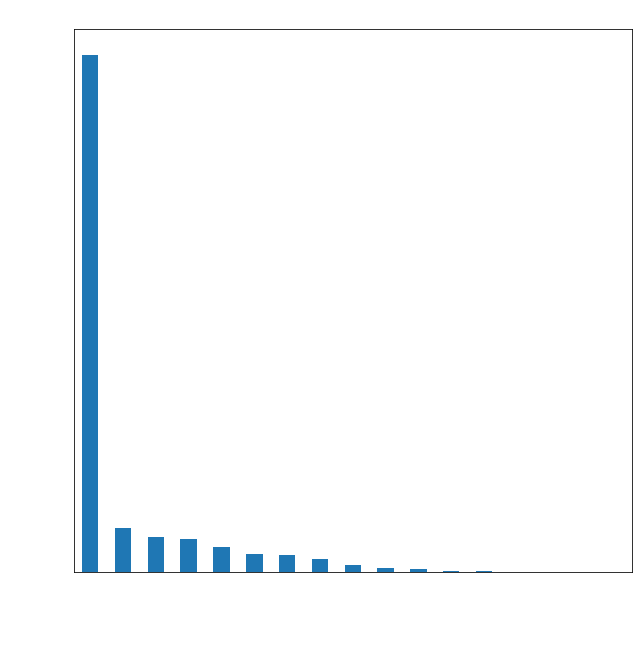

In [69]:
plt.figure(figsize=(10,10))

diabetic_new.payer_code.value_counts().plot(kind='bar')
plt.title('Types of Payer Code Counts', color='white', fontsize='22')
plt.xlabel('Payer Codes', color='white', fontsize='15', labelpad = 15, fontweight = 'bold')
plt.ylabel('Count of Occurance', color='white', fontsize='15', labelpad = 15, fontweight = 'bold')
plt.tick_params(color='white', rotation=45, labelcolor='white', labelsize='10')
plt.text(4.5,-11000, 'Fig.1 Distribution of Payer Code Counts', color='white', fontsize=12)

In [10]:
def missing_percent(column_value):
    return column_value / diabetic_new['encounter_id'].sum()

In [11]:
for i in range(len(diabetic_new)):
    if diabetic_new[diabetic_new.columns[i]].isna().sum() > 0:
        print(diabetic_new.columns[i], ': ', missing_percent(diabetic_new[diabetic_new.columns[i]].isna().sum()))

race :  1.3520176527366292e-10
weight :  5.86304566707421e-09
payer_code :  2.394492856514111e-09
medical_specialty :  2.971048382601931e-09
diag_1 :  1.2491144173985576e-12
diag_2 :  2.129442673469922e-11
diag_3 :  8.464237218848321e-11


IndexError: index 50 is out of bounds for axis 0 with size 50

    -Race < 1.5% of data
    -Weight < 6% of data
    -payer_code < 2.5% of data
    -medical_specialty < 3% of data
    -diag_1 < 1.5% of data
    -diag_2 < 2.5% of data
    -diag_3 < 8.5% of data
#### Total = ~ 25.5% of data

### Take care of Missing Values

In [184]:
diabetic_new['diag_1'] = pd.to_numeric(diabetic_new['diag_1'], errors='coerce')
diabetic_new['diag_1'] = diabetic_new['diag_1'].fillna(diabetic_new['diag_1'].mean())

In [185]:
diabetic_new['diag_2'] = pd.to_numeric(diabetic_new['diag_2'], errors='coerce')
diabetic_new['diag_2'] = diabetic_new['diag_2'].fillna(diabetic_new['diag_2'].mean())

In [186]:
diabetic_new['diag_3'] = pd.to_numeric(diabetic_new['diag_3'], errors='coerce')
diabetic_new['diag_3'] = diabetic_new['diag_3'].fillna(diabetic_new['diag_3'].mean())

In [15]:
for i in range(len(diabetic_new)):
    if diabetic_new[diabetic_new.columns[i]].isna().sum() > 0:
        print(diabetic_new.columns[i], ': ', missing_percent(diabetic_new[diabetic_new.columns[i]].isna().sum()))

race :  1.3520176527366292e-10
weight :  5.86304566707421e-09
payer_code :  2.394492856514111e-09
medical_specialty :  2.971048382601931e-09


IndexError: index 50 is out of bounds for axis 0 with size 50

In [16]:
diabetic_new['medical_specialty'].describe()

count                51817
unique                  72
top       InternalMedicine
freq                 14635
Name: medical_specialty, dtype: object

In [17]:
diabetic_new['payer_code'].describe()

count     61510
unique       17
top          MC
freq      32439
Name: payer_code, dtype: object

In [18]:
diabetic_new['weight'].unique()

array([nan, '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [19]:
diabetic_new['weight'].mode()

0    [75-100)
dtype: object

In [85]:
diabetic_new['payer_code'].mode()

0    MC
dtype: object

In [187]:
diabetic_new['payer_code'] = diabetic_new['payer_code'].fillna('MC')

In [188]:
diabetic_new[ 'medical_specialty'].mode()

0    InternalMedicine
dtype: object

In [192]:
diabetic_new['medical_specialty'] = diabetic_new['medical_specialty'].fillna('InternalMedicine')

In [190]:
diabetic_new = diabetic_new.drop(columns = ['weight', 'race'])


In [193]:
diabetic_new

,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Female,[0-10),6,25,1,1,MC,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Female,[10-20),1,1,7,3,MC,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,Female,[20-30),1,1,7,2,MC,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Male,[30-40),1,1,7,2,MC,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Male,[40-50),1,1,7,1,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,Male,[70-80),1,3,7,3,MC,InternalMedicine,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,Female,[80-90),1,4,5,5,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Male,[70-80),1,1,7,1,MC,InternalMedicine,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Female,[80-90),2,3,7,10,MC,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [25]:
diabetic_new.isna().sum()

encounter_id                0
patient_nbr                 0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol  

#### One Hot Encode

In [194]:
target = diabetic_new['readmitted']
target

0          NO
1         >30
2          NO
3          NO
4          NO
         ... 
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

In [195]:
diabetic_new.drop(['readmitted'], axis=1, inplace = True)
oneHotCols = diabetic_new.select_dtypes(exclude=np.number).columns.tolist()
oneHotCols

['gender',
 'age',
 'payer_code',
 'medical_specialty',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed']

In [196]:
diabetic_new_enc = pd.get_dummies(diabetic_new, columns=oneHotCols, drop_first = True)
diabetic_new_enc.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,2278392,8222157,6,25,1,1,41,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,149190,55629189,1,1,7,3,59,0,18,0,...,1,1,0,0,0,0,0,0,0,1
2,64410,86047875,1,1,7,2,11,5,13,2,...,0,1,0,0,0,0,0,0,1,1
3,500364,82442376,1,1,7,2,44,1,16,0,...,1,1,0,0,0,0,0,0,0,1
4,16680,42519267,1,1,7,1,51,0,8,0,...,0,1,0,0,0,0,0,0,0,1


### Logistic Regression

#### Set up Logistic Regression and Cross Validation

In [197]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000, class_weight = 'balanced', random_state = 1, solver='saga', penalty='l2')

In [133]:
target = target.ravel()

In [198]:
target

0          NO
1         >30
2          NO
3          NO
4          NO
         ... 
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size = 5, random_state=1)

In [199]:
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=1,
                   solver='saga')

In [171]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [200]:
pred = lr.predict(X_test)

In [201]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         <30       0.00      0.00      0.00         2
         >30       0.00      0.00      0.00         1
          NO       0.50      1.00      0.67         2

    accuracy                           0.40         5
   macro avg       0.17      0.33      0.22         5
weighted avg       0.20      0.40      0.27         5



/Users/allenmiller/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/allenmiller/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/allenmiller/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [144]:
lr.C = 0.002

In [160]:
y_score = lr.fit(X_train, y_train).decision_function(X_test)

ValueError: y should be a 1d array, got an array of shape (101761, 3) instead.

In [128]:
n_classes

3

In [97]:
x.head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,2278392,8222157,6,25,1,1,41,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,149190,55629189,1,1,7,3,59,0,18,0,...,1,1,0,0,0,0,0,0,0,1
2,64410,86047875,1,1,7,2,11,5,13,2,...,0,1,0,0,0,0,0,0,1,1
3,500364,82442376,1,1,7,2,44,1,16,0,...,1,1,0,0,0,0,0,0,0,1
4,16680,42519267,1,1,7,1,51,0,8,0,...,0,1,0,0,0,0,0,0,0,1


In [119]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, x, y, scoring='accuracy')

/Users/allenmiller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/allenmiller/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/allenmiller/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/allenmiller/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got l2.

  warnings.warn("Estimator f

array([nan, nan, nan, nan, nan])

In [99]:
C = np.logspace(-9, 1, num=50, base=10.0, dtype=None, axis=0)

In [100]:
C

array([1.00000000e-09, 1.59985872e-09, 2.55954792e-09, 4.09491506e-09,
       6.55128557e-09, 1.04811313e-08, 1.67683294e-08, 2.68269580e-08,
       4.29193426e-08, 6.86648845e-08, 1.09854114e-07, 1.75751062e-07,
       2.81176870e-07, 4.49843267e-07, 7.19685673e-07, 1.15139540e-06,
       1.84206997e-06, 2.94705170e-06, 4.71486636e-06, 7.54312006e-06,
       1.20679264e-05, 1.93069773e-05, 3.08884360e-05, 4.94171336e-05,
       7.90604321e-05, 1.26485522e-04, 2.02358965e-04, 3.23745754e-04,
       5.17947468e-04, 8.28642773e-04, 1.32571137e-03, 2.12095089e-03,
       3.39322177e-03, 5.42867544e-03, 8.68511374e-03, 1.38949549e-02,
       2.22299648e-02, 3.55648031e-02, 5.68986603e-02, 9.10298178e-02,
       1.45634848e-01, 2.32995181e-01, 3.72759372e-01, 5.96362332e-01,
       9.54095476e-01, 1.52641797e+00, 2.44205309e+00, 3.90693994e+00,
       6.25055193e+00, 1.00000000e+01])

In [102]:
for i in C:
    lr.C = i
    out = cross_val_score(lr, x, target, scoring='accuracy')
    print(out.mean(), out.std(), i)

0.5304817441934662 0.013461250740542614 1e-09
0.5304817441934662 0.013461250740542614 1.5998587196060573e-09
0.5304817441934662 0.013461250740542614 2.559547922699533e-09
0.5304817441934662 0.013461250740542614 4.094915062380419e-09
0.5304817441934662 0.013461250740542614 6.551285568595496e-09
0.5304817441934662 0.013461250740542614 1.0481131341546852e-08
0.5304817441934662 0.013461250740542614 1.67683293681101e-08
0.5304817441934662 0.013461250740542614 2.682695795279727e-08
0.5304817441934662 0.013461250740542614 4.291934260128778e-08
0.5304817441934662 0.013461250740542614 6.866488450042998e-08
0.5304817441934662 0.013461250740542614 1.0985411419875573e-07
0.5304817441934662 0.013461250740542614 1.757510624854793e-07
0.5304817441934662 0.013461250740542614 2.811768697974231e-07
0.5304817441934662 0.013461250740542614 4.498432668969444e-07
0.5304817441934662 0.013461250740542614 7.196856730011529e-07
0.5304817441934662 0.013461250740542614 1.151395399326448e-06
0.5304817441934662 0.0

KeyboardInterrupt: 